In [21]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [22]:
# ############LOADING DATASET #########################

data_folder = "data"
dataset = "credit_train"
file_type = ".csv"

In [23]:
df = pd.read_csv(data_folder+"/"+dataset+file_type)

In [24]:
# removing unwanted features like LOanID and CustomerID
df = df.drop(df[['Loan ID', 'Customer ID']], axis=1)

In [25]:
# Drop record if it does not have at least 'n' values that are **not** NaN out of 17 columns
# finding val of 'n', we will see how many records are dropped at each threshlod val
for i in range(1, 18):
    mod_df = df.dropna(thresh=i)
    total_rows = mod_df.shape[0]
    print('With threshold value {0} the no. of records are {1}'.format(i, total_rows))

With threshold value 1 the no. of records are 100000
With threshold value 2 the no. of records are 100000
With threshold value 3 the no. of records are 100000
With threshold value 4 the no. of records are 100000
With threshold value 5 the no. of records are 100000
With threshold value 6 the no. of records are 100000
With threshold value 7 the no. of records are 100000
With threshold value 8 the no. of records are 100000
With threshold value 9 the no. of records are 100000
With threshold value 10 the no. of records are 100000
With threshold value 11 the no. of records are 100000
With threshold value 12 the no. of records are 100000
With threshold value 13 the no. of records are 99999
With threshold value 14 the no. of records are 99578
With threshold value 15 the no. of records are 89098
With threshold value 16 the no. of records are 79015
With threshold value 17 the no. of records are 36423


In [26]:
# thresh12-10000, thresh=13-99999, thresh=14-99k, thresh=15-89k, thresh=16-79k, thresh=17-36.5k
df = df.dropna(thresh=17)

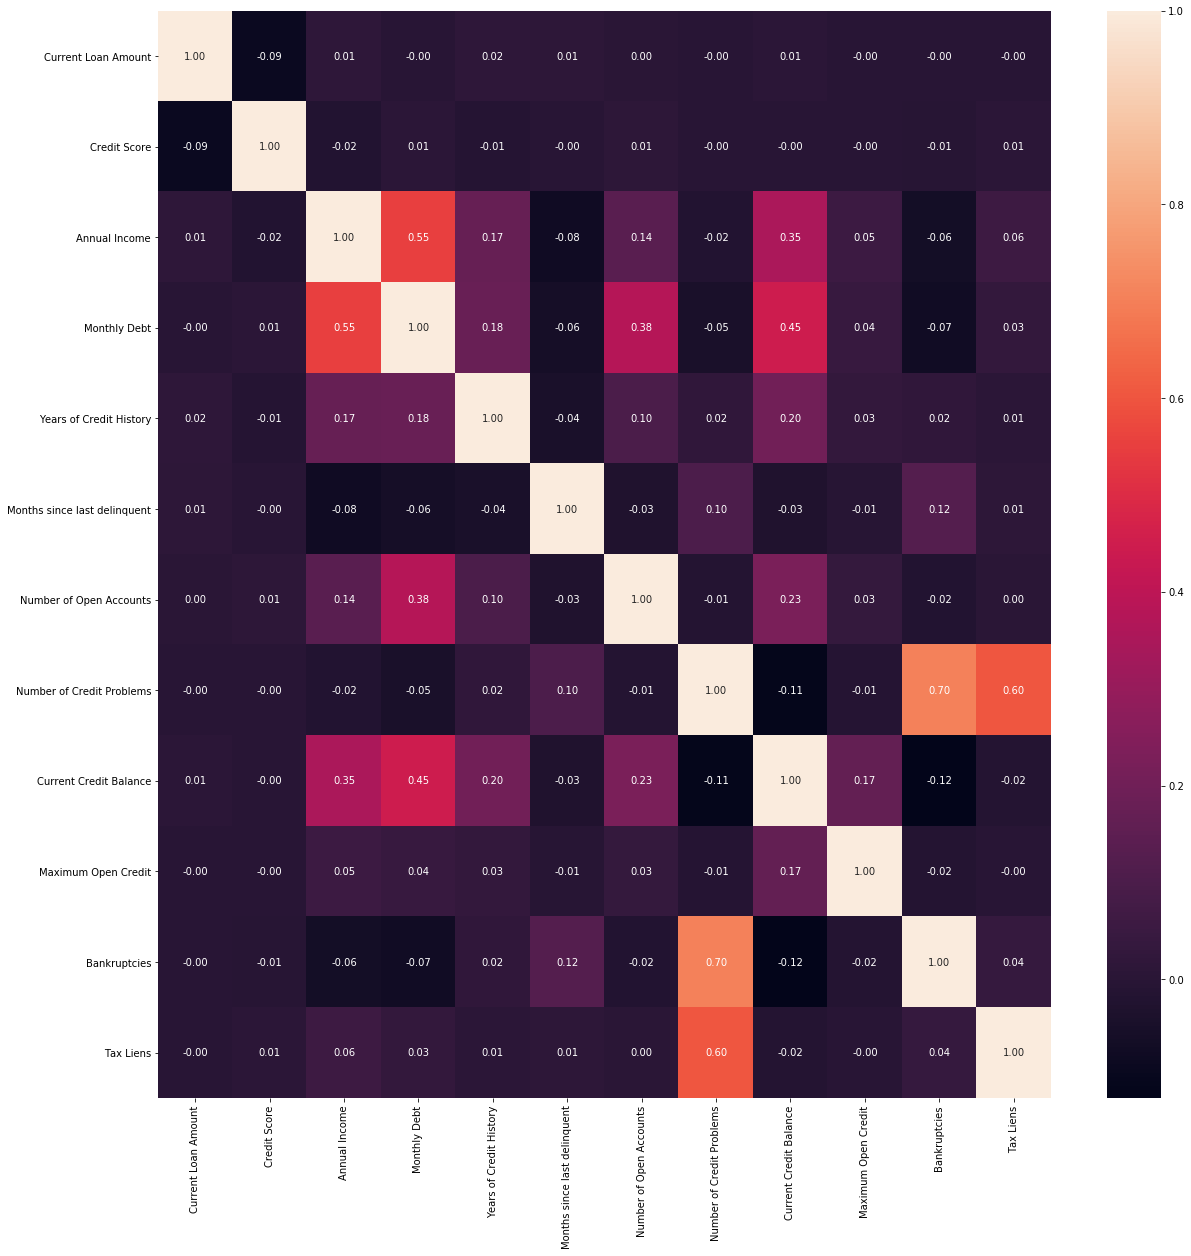

In [27]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [28]:
#removing string data from column to make it float type
mapping_dict = {'8 years':8, '10+ years':10, '3 years':3, '5 years':5, '< 1 year':0, '2 years':2,
       '4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6, 'n/a':np.nan}
def f(x):
    try:
        return mapping_dict[x]
    except:
        return x
    
df['Years in current job'] = df['Years in current job'].apply(f).astype(np.float64)

In [29]:
# Finding the median value in the respective columns
def cs(i):
    if i>1000:
        i=i/10
        return(i)
    else:
        return(i)
df['Credit Score']=df['Credit Score'].apply(cs)

In [30]:
df['Credit Score'].fillna(value=df.groupby('Home Ownership')['Credit Score'].transform('median'), inplace=True)
df['Annual Income'].fillna(value=df.groupby('Purpose')['Annual Income'].transform('median'), inplace=True)
df['Years in current job'].fillna(value=df.groupby('Home Ownership')['Years in current job'].transform('median'), inplace=True)
df['Months since last delinquent'].fillna(0,inplace=True)
df['Maximum Open Credit'].fillna(value=df.groupby('Home Ownership')['Maximum Open Credit'].transform('median'),inplace=True)
df['Bankruptcies'].fillna(0,inplace=True)
df['Tax Liens'].fillna(0,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36423 entries, 2 to 99997
Data columns (total 17 columns):
Loan Status                     36423 non-null object
Current Loan Amount             36423 non-null float64
Term                            36423 non-null object
Credit Score                    36423 non-null float64
Annual Income                   36423 non-null float64
Years in current job            36423 non-null float64
Home Ownership                  36423 non-null object
Purpose                         36423 non-null object
Monthly Debt                    36423 non-null float64
Years of Credit History         36423 non-null float64
Months since last delinquent    36423 non-null float64
Number of Open Accounts         36423 non-null float64
Number of Credit Problems       36423 non-null float64
Current Credit Balance          36423 non-null float64
Maximum Open Credit             36423 non-null float64
Bankruptcies                    36423 non-null float64
Tax Liens      

In [31]:
# #################################### Checking no. of Loan payers / non-payers #############
df_paid = df[df['Loan Status'] == 'Fully Paid']
df_non_paid = df[df['Loan Status'] == 'Charged Off']

df.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,0.0,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,Fully Paid,548746.0,Short Term,678.0,2559110.0,2.0,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,Fully Paid,99999999.0,Short Term,728.0,714628.0,3.0,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,Fully Paid,99999999.0,Short Term,740.0,776188.0,0.0,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,Fully Paid,234124.0,Short Term,727.0,693234.0,10.0,Rent,Debt Consolidation,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,Fully Paid,666204.0,Long Term,723.0,1821967.0,10.0,Home Mortgage,Debt Consolidation,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,Charged Off,317108.0,Long Term,687.0,1133274.0,8.0,Rent,Debt Consolidation,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
25,Fully Paid,465410.0,Long Term,688.0,1722654.0,3.0,Rent,Buy House,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
28,Fully Paid,99999999.0,Short Term,746.0,1749748.0,10.0,Home Mortgage,Debt Consolidation,19247.19,20.0,32.0,17.0,0.0,224390.0,295240.0,0.0,0.0


In [12]:
print("Number of people who paid their loan fully: {}".format(df_paid.shape[0]))
print("Number of people who didn't paid their loan fully: {}".format(df_non_paid.shape[0]))

Number of people who paid their loan fully: 28972
Number of people who didn't paid their loan fully: 7451


In [33]:
# dealing  with categorical values
df_preprocessed = df.copy()

# create a variable with the values of the target variable
loan_target = df['Loan Status']

In [34]:
# remove it from the dataframe so it only contains the features that our model should use
df = df.drop(df[['Home Ownership', 'Purpose']], axis=1)

In [35]:
# encode the target variable into a numeric value
label_encoder = preprocessing.LabelEncoder()
df['Loan Status'] = df['Loan Status'].astype(np.str)
df['Loan Status'] = label_encoder.fit_transform(df['Loan Status'])

label_encoder1 = preprocessing.LabelEncoder()
df['Term'] = label_encoder1.fit_transform(df['Term'])

In [36]:
# encode features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df_preprocessed[['Home Ownership', 'Purpose']]).toarray(),
                       columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 20 columns):
Home Ownership_HaveMortgage     36423 non-null float64
Home Ownership_Home Mortgage    36423 non-null float64
Home Ownership_Own Home         36423 non-null float64
Home Ownership_Rent             36423 non-null float64
Purpose_Business Loan           36423 non-null float64
Purpose_Buy House               36423 non-null float64
Purpose_Buy a Car               36423 non-null float64
Purpose_Debt Consolidation      36423 non-null float64
Purpose_Educational Expenses    36423 non-null float64
Purpose_Home Improvements       36423 non-null float64
Purpose_Medical Bills           36423 non-null float64
Purpose_Other                   36423 non-null float64
Purpose_Take a Trip             36423 non-null float64
Purpose_major_purchase          36423 non-null float64
Purpose_moving                  36423 non-null float64
Purpose_other                   36423 non-null float64
Purpose_ren

In [37]:
# ################### Run this cell only if you want to add One hot encoding values for columns ['Home Ownership', 'Purpose']

# encode features
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(df_preprocessed[['Home Ownership', 'Purpose']]).toarray(),
                       columns=encoder.get_feature_names(['Home Ownership', 'Purpose']))
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36423 entries, 0 to 36422
Data columns (total 20 columns):
Home Ownership_HaveMortgage     36423 non-null float64
Home Ownership_Home Mortgage    36423 non-null float64
Home Ownership_Own Home         36423 non-null float64
Home Ownership_Rent             36423 non-null float64
Purpose_Business Loan           36423 non-null float64
Purpose_Buy House               36423 non-null float64
Purpose_Buy a Car               36423 non-null float64
Purpose_Debt Consolidation      36423 non-null float64
Purpose_Educational Expenses    36423 non-null float64
Purpose_Home Improvements       36423 non-null float64
Purpose_Medical Bills           36423 non-null float64
Purpose_Other                   36423 non-null float64
Purpose_Take a Trip             36423 non-null float64
Purpose_major_purchase          36423 non-null float64
Purpose_moving                  36423 non-null float64
Purpose_other                   36423 non-null float64
Purpose_ren

In [38]:
df.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,1,99999999.0,1,741.0,2231892.0,8.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,0.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1,548746.0,1,678.0,2559110.0,2.0,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,1,99999999.0,1,728.0,714628.0,3.0,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,1,99999999.0,1,740.0,776188.0,0.0,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
14,1,234124.0,1,727.0,693234.0,10.0,14211.24,24.7,46.0,10.0,1.0,28291.0,107052.0,1.0,0.0
17,1,666204.0,0,723.0,1821967.0,10.0,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,0,317108.0,0,687.0,1133274.0,8.0,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
25,1,465410.0,0,688.0,1722654.0,3.0,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
28,1,99999999.0,1,746.0,1749748.0,10.0,19247.19,20.0,32.0,17.0,0.0,224390.0,295240.0,0.0,0.0


In [39]:
# Run this cell only if you want to add the One Hot Encoded values for ['Home Ownership', 'Purpose'] into training data
# merging categorical encoded dataframe with the main dataframe and deleting unwanted features
df_final = df.reset_index(drop=True).merge(encoded.reset_index(drop=True), left_index=True, right_index=True)

In [40]:
df_final.to_csv(data_folder+"/"+dataset+"_processed"+file_type)